Date: 3rd January 2024

### Particle Swarm Optimization <br>
In this notebook, we attempt to implement the Particle Swarm Optimization (PSO) algorithm to solve the goerner4 SIP.

In [ ]:
import numpy as np

**Function 1 (Computation of $G(\omega)$)** <br>


In [10]:
import numpy as np
from scipy.optimize import minimize

def optimize_program(t, print_point = 0):

    # Number of constraint sets (50 in this example)
    num_constraint_sets = 7

    def objective_function(x):
      return x[6]

    # Define a list to store the constraint functions
    constraint_functions = []

    def bounds_function(i):
        return (None, None)  # x[i] >= 0, where None means no upper bound
    # Create a list of bounds using the dynamically created functions
    bounds = [bounds_function(i) for i in range(0, num_constraint_sets)]

    # Define the constraint function based on the provided expression
    def constraint_function1(x, k):
      y = t[k][0] * np.exp(t[k][1]) \
      - (x[0] + x[1] * t[k][0] + x[2] * t[k][1] + x[3] * t[k][0]**2 + x[4] * t[k][0] * t[k][1] + x[5] * t[k][1]**2) - x[6]
      return y

    def constraint_function2(x, k):
      y = -t[k][0] * np.exp(t[k][1]) \
      + (x[0] + x[1] * t[k][0] + x[2] * t[k][1] + x[3] * t[k][0]**2 + x[4] * t[k][0] * t[k][1] + x[5] * t[k][1]**2) - x[6]
      return y

    # Define a list to store the constraint functions
    constraint_functions1 = [lambda x, k=k: -constraint_function1(x, k) for k in range(num_constraint_sets)]
    constraint_functions2 = [lambda x, k=k: -constraint_function2(x, k) for k in range(num_constraint_sets)]
    merged_constraint_functions = constraint_functions1 + constraint_functions2

    # Create a list of constraints using the dynamically created functions
    constraints = [{'type': 'ineq', 'fun': func} for func in merged_constraint_functions]

    # Initial guess
    initial_guess = [1] * 7

    # Minimization using scipy.optimize
    result = minimize(objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

    # Return the optimal solution and objective function value
    if print_point == 0:
      return result.fun
    elif print_point == 1:
      return result.fun, result.x


In [32]:
# Example usage:
input_array = optimal_points_pso[-1] # Adjust the input array as needed
optimal_value, optimal_point = optimize_program(input_array, 1)

# Display the results 0.6862911497389104
# Display the results 0.6862911497187705
print("Optimal objective function value:", optimal_value)
print("Optimal objective function point:", optimal_point)

Optimal objective function value: 0.05332112226786042
Optimal objective function point: [ 0.05332112  0.44667887 -0.42660957  0.44667889  1.71828183  0.42660957
  0.05332112]


**Function 3 (Initial Point)** <br>
Given an interval $I$ and $n,k$ which are dimensions of an array, generate a numpy array of dimension $n \times k$ and initialize it elementwise with a number randomly chosen from the interval $I$.

In [1]:
import numpy as np

def generate_initial_point(n, k, interval_I):
    """
    Generate an initial point numpy array of dimension n x k with random values from interval I.

    Parameters:
    - n: Number of rows.
    - k: Number of columns.
    - interval_I: Tuple representing the interval (start, end).

    Returns:
    - initial_point: Numpy array of shape (n, k) with random values from interval I.
    """
    start, end = interval_I
    end_inclusive = end + 1e-10  # A small offset to include the endpoint
    initial_point = np.random.uniform(start, end_inclusive, size=(n, k))
    return initial_point

In [12]:
# Example usage:
interval_I = (0, 1)  # Adjust the interval I as needed
n = 7  # Number of rows
k = 2  # Number of columns

initial_point = generate_initial_point(n, k, interval_I)
print("Initial Point:\n", initial_point)

Initial Point:
 [[0.73567761 0.64293462]
 [0.04453149 0.39902109]
 [0.18920948 0.99230882]
 [0.25281432 0.75304366]
 [0.38738427 0.21683881]
 [0.22739901 0.55394447]
 [0.53987483 0.9318751 ]]


In [13]:
# Example usage:
input_array = initial_point # Adjust the input array as needed
optimal_value, optimal_point = optimize_program(input_array, 1)

# Display the results 0.6862911497389104
# Display the results 0.6862911497187705
print("Optimal objective function value:", optimal_value)
print("Optimal objective function point:", optimal_point)

Optimal objective function value: 0.00012346821523170166
Optimal objective function point: [ 1.24368497e-01  7.55617539e-01 -4.42187575e-01 -1.85404931e-01
  2.06658259e+00  3.05010405e-01  1.23468215e-04]


**Function 4 (Particle Swarm Optimization)** <br>
Function: The method in which the PSO algorithm will work is as follows: <br>
1. The optimization routine will run for a given number of iterations (say, $T$ = 100) <br>
2. The total number of particles in our swarm will be fixed, let us call this number $P$, for population <br>
3. At each iteration, each of the particles shall occupy one of the locations in the $U$-space, i.e. the domain $U^n$. Thus, associated with each particle $i$, there is a matrix $U_i$ and the particle can obtain the fitness function for that $U_i$, given by $f(U_i)$. <br>
4. Along with the location, there is also a velocity term $\Delta U_i$, which decides the new position of the particle at the end of the iteration. This is again a matrix. <br>
5. The initial locations and velocities have to be defined through some initialization procedure. One could use methods such as blue noise, white noise sampling, which allow for a good distribution. One could also see whether PSO methods are susceptible to minor changes in the initial conditions. <br>
6. Once $f(U_i)$ is computed for all $i$, we find out the position of the best particle and the best value achieved through the algorithm <br>
7. Once that is done, the state and velocity matrices are updated according to the update rule, which has three hyperparameters: $I_v$, the inertia weight, $S_d$, the social displacement component and $C_d$, the cognitive displacement component. <br>
8. Once can also choose some norm during the update for considering the terms to be used. <br>
9. Further, the algorithm should also track the personal best and global best values throughout the run of the algorithm <br>
10. Since runtime of the algorithm is a good metric to be used, we also want the algorithm to compute the runtime.

**Function 4.1 (Initialization)** <br>

In [14]:
import numpy as np

def initialize_particles(num_particles, n, k, interval_I):
    """
    Initialize particle positions and velocities.

    Parameters:
    - num_particles: Number of particles in the swarm.
    - num_dimensions: Number of dimensions in the search space.
    - interval_I: Tuple representing the interval (start, end) for random initialization.

    Returns:
    - positions: List of numpy arrays, each of shape (num_dimensions,) representing particle positions.
    - velocities: List of numpy arrays, each of shape (num_dimensions,) representing particle velocities.
    """
    positions = [generate_initial_point(n, k, interval_I) for _ in range(num_particles)]
    velocities = [generate_initial_point(n, k, interval_I) for _ in range(num_particles)]
    return positions, velocities

In [ ]:
# Example usage:
num_particles_example = 10
n = 2
k = 2
interval_I_example = (0, 1)

initial_positions, initial_velocities = initialize_particles(num_particles_example, n, k, interval_I_example)

**Function 4.2 (Fitness Computation)** <br>

In [15]:
def evaluate_fitness(positions, n):
    """
    Evaluate the fitness function for each particle.

    Parameters:
    - positions: List of numpy arrays, each of shape (num_dimensions,) representing particle positions.
    - n: Number of rows.

    Returns:
    - fitness_values: List of fitness values corresponding to each particle.
    """
    fitness_values = [optimize_program(position) for position in positions]
    return fitness_values

In [ ]:
# Example usage:
num_particles = 100
n = 2
k = 2
interval_I = (0, 1)

# Initialize particles
positions, velocities = initialize_particles(num_particles, n, k, interval_I)

# Evaluate fitness values
fitness_values = evaluate_fitness(positions, n)

# Print the results
for i, (position, fitness) in enumerate(zip(positions, fitness_values), 1):
    print(f"Particle {i} - Position: {position}, Fitness: {fitness}")

Particle 1 - Position: [[0.04210007 0.69747627]
 [0.27131026 0.39400924]], Fitness: 1.925929944387236e-34
Particle 2 - Position: [[0.04561515 0.70734221]
 [0.69107376 0.14737404]], Fitness: 0.41698964654760884
Particle 3 - Position: [[0.35097926 0.21116469]
 [0.0065428  0.41050032]], Fitness: 0.09526653086148638
Particle 4 - Position: [[0.72504757 0.00224745]
 [0.82980945 0.39457225]], Fitness: 0.6820403622508151
Particle 5 - Position: [[0.68946934 0.33328376]
 [0.89516187 0.18458289]], Fitness: 0.42500457289986304
Particle 6 - Position: [[0.28822633 0.91314075]
 [0.67247232 0.57515803]], Fitness: 0.011238592732154717
Particle 7 - Position: [[0.66099499 0.36469045]
 [0.32689541 0.2442064 ]], Fitness: 0.12300140818185418
Particle 8 - Position: [[0.86566235 0.67588971]
 [0.32191042 0.82820403]], Fitness: 0.02670637617067087
Particle 9 - Position: [[0.822013   0.45358089]
 [0.53209417 0.38548348]], Fitness: 0.12296371874763214
Particle 10 - Position: [[0.80325018 0.43849913]
 [0.72232017 

**Function 4.3 (Retention)** <br>

In [16]:
def update_best_fitness(current_best, fitness_values):
    """

    Parameters:
    - current_best: List of the current best fitness values.
    - fitness_values: List of the new fitness values.


    Returns:
    - updated_best: List of updated best fitness values.
    """
    # Update best fitness
    current_best = max(current_best, fitness_values)
    return current_best

In [ ]:
print(update_best_fitness(fitness_values, fitness_values))

[1.925929944387236e-34, 0.41698964654760884, 0.09526653086148638, 0.6820403622508151, 0.42500457289986304, 0.011238592732154717, 0.12300140818185418, 0.02670637617067087, 0.12296371874763214, 0.1264951198179297, 1.925929944387236e-34, 0.6740869519794938, 0.0001406596775104686, 0.06254441681569778, 0.030862701043060985, 0.0003038521373814674, 0.04372859455859418, 0.6739091176962633, 0.16826897210920067, 0.6087788688750435, 0.026522540555230525, 0.08942318305494784, 1.925929944387236e-34, 0.01626740857293501, 1.925929944387236e-34, 1.925929944387236e-34, 1.925929944387236e-34, 0.3411472123315077, 1.925929944387236e-34, 0.010054723685254636, 1.925929944387236e-34, 0.04364105036027497, 0.28342279429210454, 0.0437331698981487, 0.001484425134888502, 0.0010983962232897944, 0.2971907079734505, 0.009460183620006082, 0.6363847111832375, 0.2587230366616965, 0.6615833363786068, 0.07317502139489096, 0.5781314504001027, 0.011338972041168498, 0.0022339650621714374, 0.528666841113873, 0.49750551044175

In [17]:
def update_best_positions(positions, fitness_values, current_best_positions, current_best, n_particles):
    """
    Update the best position at a specific index based on the current positions and fitness values.

    Parameters:
    - current_best_positions: List of the current best positions.
    - positions: List of the new positions.
    - fitness_values: List of the fitness values corresponding to the positions.
    - index: Index at which to update the best position.

    Returns:
    - updated_best_positions: List of updated best positions.
    """
    for index in range(0, n_particles):
      if fitness_values[index] > current_best[index]:
          current_best_positions[index] = positions[index]
    return current_best_positions


In [ ]:
print(update_best_positions(positions, fitness_values, positions, fitness_values, 100))

[array([[0.04210007, 0.69747627],
       [0.27131026, 0.39400924]]), array([[0.04561515, 0.70734221],
       [0.69107376, 0.14737404]]), array([[0.35097926, 0.21116469],
       [0.0065428 , 0.41050032]]), array([[0.72504757, 0.00224745],
       [0.82980945, 0.39457225]]), array([[0.68946934, 0.33328376],
       [0.89516187, 0.18458289]]), array([[0.28822633, 0.91314075],
       [0.67247232, 0.57515803]]), array([[0.66099499, 0.36469045],
       [0.32689541, 0.2442064 ]]), array([[0.86566235, 0.67588971],
       [0.32191042, 0.82820403]]), array([[0.822013  , 0.45358089],
       [0.53209417, 0.38548348]]), array([[0.80325018, 0.43849913],
       [0.72232017, 0.62229619]]), array([[0.71496668, 0.77076027],
       [0.07671589, 0.07839183]]), array([[0.52172574, 0.0046513 ],
       [0.62822835, 0.4917668 ]]), array([[0.45615349, 0.59423551],
       [0.98875262, 0.97223765]]), array([[0.08925649, 0.72808834],
       [0.91255553, 0.61366785]]), array([[0.48498038, 0.70221426],
       [0.3023

In [18]:
def find_global_best_position(current_global_best, current_global_best_value, positions, fitness_values):
    """
    Find the global best position based on the fitness values.

    Parameters:
    - current_global_best: Current global best position.
    - current_global_best_value: Current global best fitness value.
    - positions: List of particle positions.
    - fitness_values: List of fitness values corresponding to the positions.

    Returns:
    - updated_global_best_position: Updated global best position.
    - updated_global_best_value: Updated global best fitness value.
    """
    max_fitness = max(fitness_values)

    if max_fitness > current_global_best_value:
        max_index = fitness_values.index(max_fitness)
        updated_global_best_position = positions[max_index]
        updated_global_best_value = max_fitness
    else:
        updated_global_best_position = current_global_best
        updated_global_best_value = current_global_best_value

    return updated_global_best_position, updated_global_best_value


**Function 4.4 (Velocity Update)**

In [19]:
import numpy as np

def update_particles(positions, velocities, global_best, personal_best, inertia_weight, social_weight, cognitive_weight, interval_I):
    """
    Update particle velocities.

    Parameters:
    - positions: List of numpy arrays, each of shape (num_dimensions,) representing particle positions.
    - velocities: List of numpy arrays, each of shape (num_dimensions,) representing particle velocities.
    - global_best: Global best position.
    - personal_best: List of personal best positions for each particle.
    - inertia_weight: Inertia weight parameter.
    - social_weight: Social weight parameter.
    - cognitive_weight: Cognitive weight parameter.
    - interval_I: Tuple representing the interval (start, end) for random initialization.

    Returns:
    - updated_velocities: List of updated particle velocities.
    """
    num_particles = len(positions)
    num_dimensions = len(positions[0])

    updated_velocities = []
    updated_positions = []

    for i in range(num_particles):
        # Inertia term
        inertia_term = inertia_weight * velocities[i]

        # Social term
        social_term = social_weight * np.random.rand() * (global_best - positions[i])

        # Cognitive term
        cognitive_term = cognitive_weight * np.random.rand() * (personal_best[i] - positions[i])

        # Update velocity for the current particle
        updated_velocity = inertia_term + social_term + cognitive_term

        # Clip velocity to the interval
        velocity_magnitude = np.linalg.norm(updated_velocity)
        max_velocity_magnitude = interval_I[1] - interval_I[0]
        normalized_velocity = (updated_velocity / velocity_magnitude) * max_velocity_magnitude
        updated_velocity = np.clip(normalized_velocity, -max_velocity_magnitude, max_velocity_magnitude)

        updated_position = np.clip(positions[i] + updated_velocity, interval_I[0], interval_I[1])
        updated_velocities.append(updated_velocity)
        updated_positions.append(updated_position)
    return updated_positions, updated_velocities


**Function 4.5 (PSO Loop)** <br>

In [22]:
import numpy as np
import time

def particle_swarm_optimization(tau, num_particles, n, k, interval_I, inertia_weight=0.5, social_weight=1.5, cognitive_weight=1.5):
    """
    Particle Swarm Optimization algorithm.

    Parameters:
    - tau: Number of iterations.
    - num_particles: Number of particles in the swarm.
    - n: Number of rows.
    - k: Number of columns.
    - interval_I: Tuple representing the interval (start, end).
    - inertia_weight: Inertia weight parameter.
    - social_weight: Social weight parameter.
    - cognitive_weight: Cognitive weight parameter.

    Returns:
    - optimal_points: List of best points found during the iterations.
    - optimal_values: List of corresponding maximum values of G.
    """
    # Initialization
    positions, velocities = initialize_particles(num_particles, n, k, interval_I)
    fitness_values = evaluate_fitness(positions, n)
    personal_best = positions.copy()
    personal_best_values = fitness_values.copy()
    global_best_index = fitness_values.index(max(fitness_values))
    global_best = positions[global_best_index]
    global_best_value = max(fitness_values)

    optimal_points = [global_best]
    optimal_values = [fitness_values[global_best_index]]
    start_time = time.time()

    N = 1  # Iteration counter

    while N < tau:
        # Update particle positions and velocities
        positions, velocities = update_particles(positions, velocities, global_best, personal_best, inertia_weight, social_weight, cognitive_weight, interval_I)

        # Evaluate fitness for the new positions
        fitness_values = evaluate_fitness(positions, n)

        personal_best_values = update_best_fitness(personal_best_values, fitness_values)
        personal_best  = update_best_positions(positions, fitness_values, personal_best, personal_best_values, num_particles)
        # Update global best
        global_best, global_best_value = find_global_best_position(global_best, global_best_value, positions, fitness_values)

        # Update optimal value
        optimal_points.append(global_best)
        optimal_values.append(global_best_value)

        # Update iteration counter
        N += 1
    end_time = time.time()
    runtime = end_time - start_time
    return optimal_points, optimal_values, runtime


In [27]:

# Example usage
tau_pso = 100
num_particles_pso = 20
n_pso = 7
k_pso = 2
interval_I_pso = (0, 1)

optimal_points_pso, optimal_values_pso, runtime = particle_swarm_optimization(tau_pso, num_particles_pso, n_pso, k_pso, interval_I_pso)

print("Runtime of the algorithm:", runtime, " seconds")
# You can use optimal_points_pso and optimal_values_pso for plotting and analysis

Runtime of the algorithm: 54.607645988464355  seconds


In [28]:
print(optimal_values_pso)

[0.009655587013555867, 0.009655587013555867, 0.017154805724658946, 0.018478058121667307, 0.020380445613168343, 0.024461925707402125, 0.02572855132545682, 0.03096733901488203, 0.03464108498234696, 0.03464108498234696, 0.037235261270004906, 0.037235261270004906, 0.045360787031983256, 0.05323621990137536, 0.05323621990137536, 0.05323621990137536, 0.05323621990137536, 0.05323621990137536, 0.05323621990137536, 0.05323621990137536, 0.05323621990137536, 0.05323621990137536, 0.05323621990137536, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0.053298112096154364, 0

In [29]:
print(optimal_points_pso)

[array([[0.47658745, 0.01434216],
       [0.81299075, 0.70648539],
       [0.83434298, 0.87615143],
       [0.54547604, 0.34641778],
       [0.6594879 , 0.94851595],
       [0.66026812, 0.25077672],
       [0.85449979, 0.03965396]]), array([[0.47658745, 0.01434216],
       [0.81299075, 0.70648539],
       [0.83434298, 0.87615143],
       [0.54547604, 0.34641778],
       [0.6594879 , 0.94851595],
       [0.66026812, 0.25077672],
       [0.85449979, 0.03965396]]), array([[0.45757032, 0.        ],
       [0.82451344, 0.68731003],
       [0.83733804, 1.        ],
       [0.50285685, 0.32420623],
       [0.64330572, 1.        ],
       [0.64749896, 0.2169118 ],
       [0.84731733, 0.02329131]]), array([[0.44351504, 0.        ],
       [0.87518053, 0.63242538],
       [0.87897131, 1.        ],
       [0.4991803 , 0.34367103],
       [0.68970773, 1.        ],
       [0.58713152, 0.23590439],
       [0.89669138, 0.        ]]), array([[0.27742828, 0.        ],
       [1.        , 0.47753423],
 

**Function 10 (Optimal Value Graph)** <br>
Function: Plot the optimal value achieved by the algorithm against the number of iterations

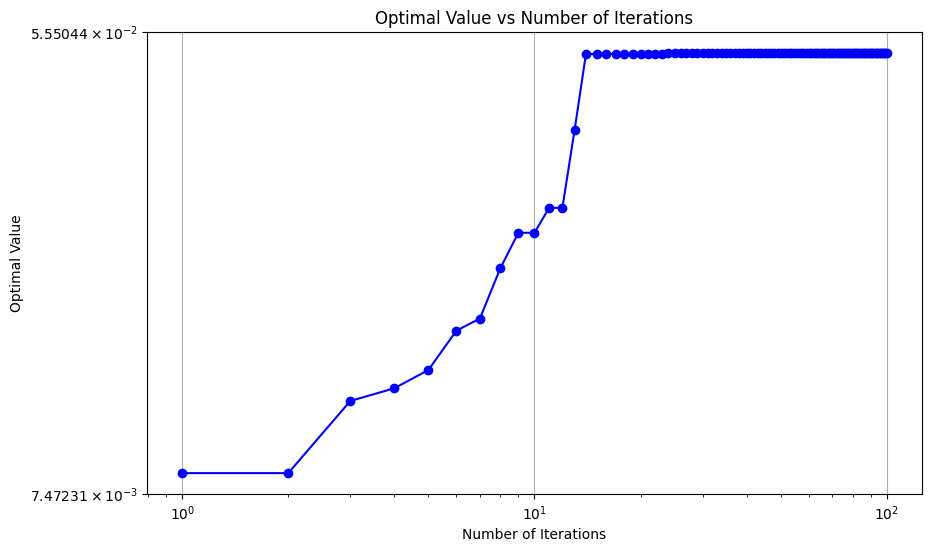

In [30]:
import matplotlib.pyplot as plt

def plot_optimal_values(optimal_values, log_scale=False):
    """
    Plot the graph of optimal values against the number of iterations.

    Parameters:
    - optimal_values: List of optimal values.
    - log_scale: Boolean, whether to use a logarithmic scale for the x-axis.
    """
    iterations = range(1, len(optimal_values) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(iterations, optimal_values, marker='o', linestyle='-', color='b')
    plt.title('Optimal Value vs Number of Iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Optimal Value')

    if log_scale:
        plt.xscale('log')
        plt.yscale('symlog')

    plt.grid(True)
    plt.show()

# Example usage:
plot_optimal_values(optimal_values_pso, log_scale=True)


**Function 11 (Visualize $U^n$)** <br>
Code to visualize how the points travelled by the algorithm change over the course of the iterations.

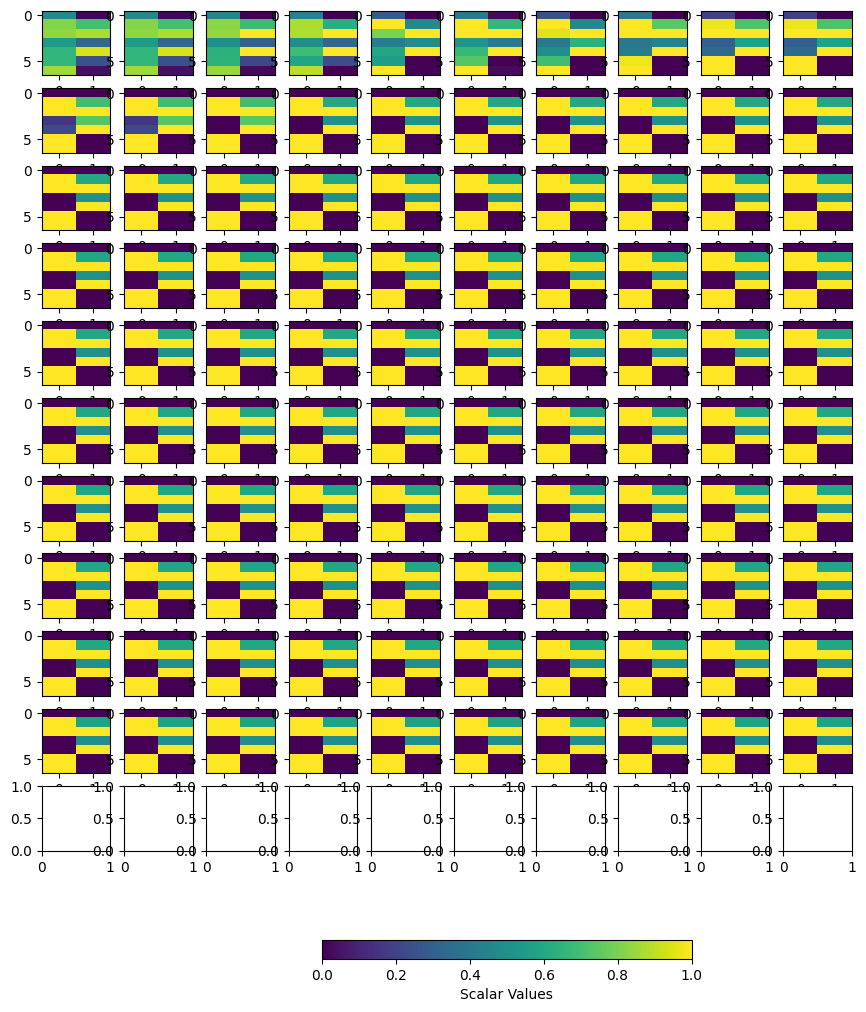

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Set up the layout of subplots
num_rows = int(len(optimal_points_pso)/10)+ 1
num_cols = 10
u_points = optimal_points_pso

# Create a figure and axis
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each 2x3 array in u_points up to the number of available subplots
cmap = 'viridis'
vmin, vmax = np.min(u_points), np.max(u_points)

for i, array in enumerate(u_points[:len(axes)]):
    ax = axes[i]
    im = ax.imshow(array, cmap=cmap, interpolation='none', aspect='auto', vmin=vmin, vmax=vmax)
    #ax.set_title(f"Array {i+1}")

# Create a ScalarMappable
norm = Normalize(vmin=vmin, vmax=vmax)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # This line is necessary for the ScalarMappable to work

# Create a colorbar
cbar = plt.colorbar(sm, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label('Scalar Values')

# Adjust layout using subplots_adjust
plt.subplots_adjust(bottom=0.2, right=0.8, top=0.9)

# Show the plot
plt.show()

